In [ ]:
# GREENPULSE — Visualization Notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Global plot settings
sns.set_theme(style="darkgrid", palette="Greens_d")
plt.rcParams.update({
    "axes.facecolor": "#0d1f0d",
    "figure.facecolor": "#0d1f0d",
    "axes.edgecolor": "white",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "text.color": "white",
    "grid.color": "#446644",
    "axes.titleweight": "bold"
})

# 1. Load datasets
df1 = pd.read_csv("subnational_1_tree_cover_loss.csv")
df2 = pd.read_csv("subnational_2_tree_cover_loss.csv")

df1.columns = df1.columns.str.strip().str.lower().str.replace(" ", "_")
df2.columns = df2.columns.str.strip().str.lower().str.replace(" ", "_")

common_cols = [col for col in df1.columns if col in df2.columns]
data = pd.concat([df1[common_cols], df2[common_cols]], ignore_index=True)

print("Data loaded and combined successfully.")


Data loaded and combined successfully.


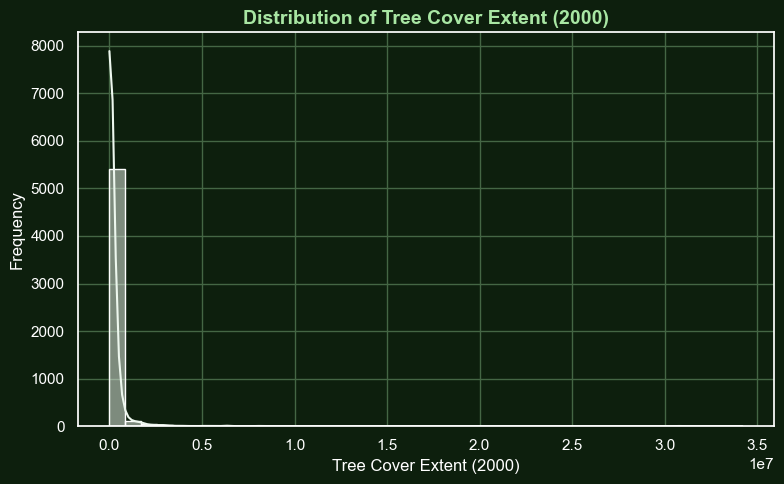

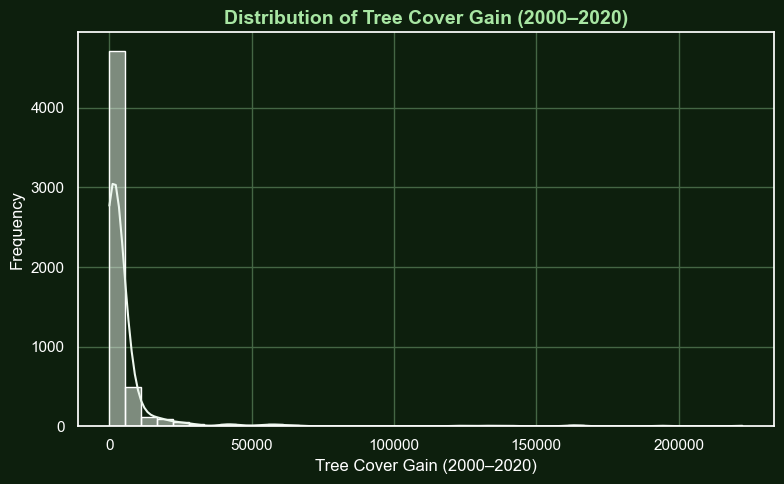

In [ ]:
for col, label in [("extent_2000_ha", "Tree Cover Extent (2000)"),
                   ("gain_2000-2020_ha", "Tree Cover Gain (2000–2020)")]:
    if col in data.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(data[col], bins=40, kde=True, color="#2d7234")
        plt.title(f"Distribution of {label}", fontsize=14, color="#a8e6a3")
        plt.xlabel(label)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()


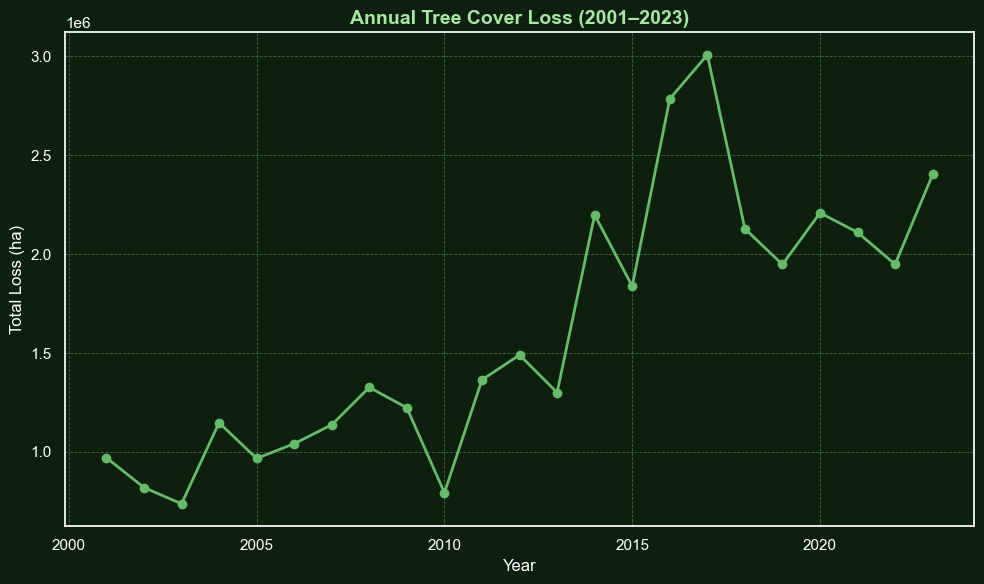

In [4]:
loss_cols = [c for c in data.columns if c.startswith("tc_loss_ha_")]
if loss_cols:
    loss_years = [int(c.split("_")[-1]) for c in loss_cols]
    loss_values = data[loss_cols].sum().values

    plt.figure(figsize=(10, 6))
    plt.plot(loss_years, loss_values, marker="o", color="#66bb6a", linewidth=2)
    plt.title("Annual Tree Cover Loss (2001–2023)", fontsize=14, color="#a8e6a3")
    plt.xlabel("Year")
    plt.ylabel("Total Loss (ha)")
    plt.grid(True, linestyle="--", linewidth=0.6)
    plt.tight_layout()
    plt.show()


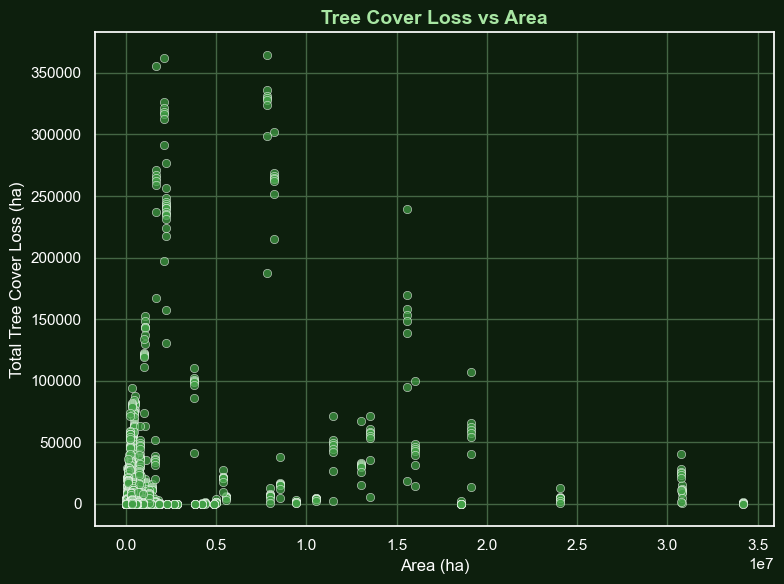

In [8]:
if "area_ha" in data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x="area_ha", y=data[loss_cols].sum(axis=1), data=data, color="#43a047", alpha=0.7)
    plt.title("Tree Cover Loss vs Area", fontsize=14, color="#a8e6a3")
    plt.xlabel("Area (ha)")
    plt.ylabel("Total Tree Cover Loss (ha)")
    plt.tight_layout()
    plt.show()


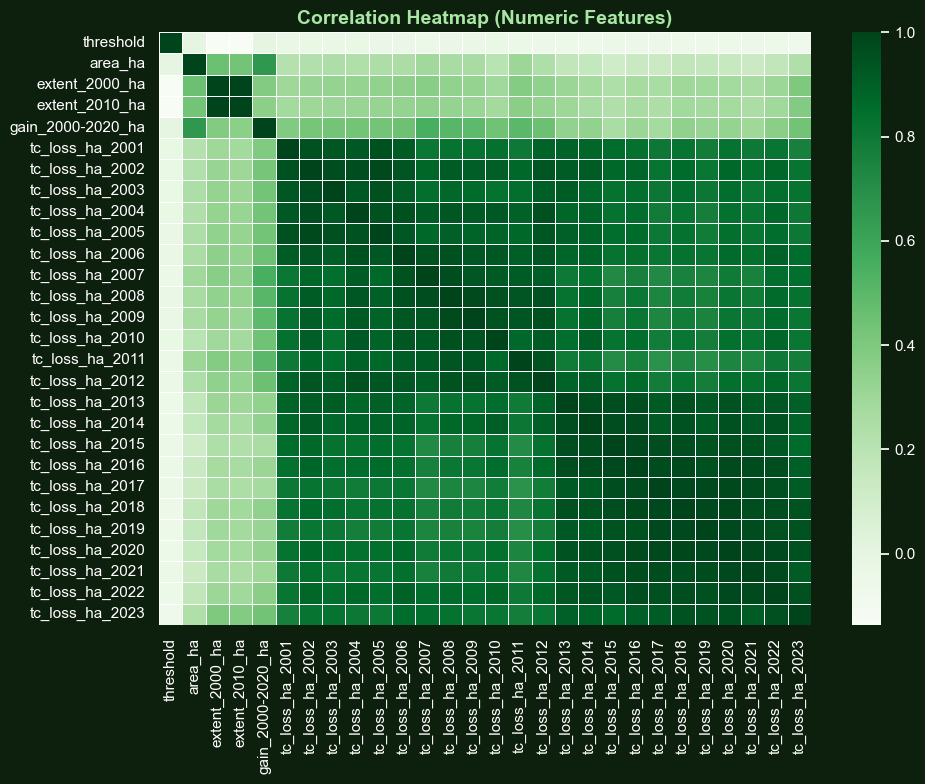

In [9]:
numeric_data = data.select_dtypes(include=np.number)
if not numeric_data.empty:
    corr = numeric_data.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, cmap="Greens", linewidths=0.5, annot=False)
    plt.title("Correlation Heatmap (Numeric Features)", fontsize=14, color="#a8e6a3")
    plt.tight_layout()
    plt.show()


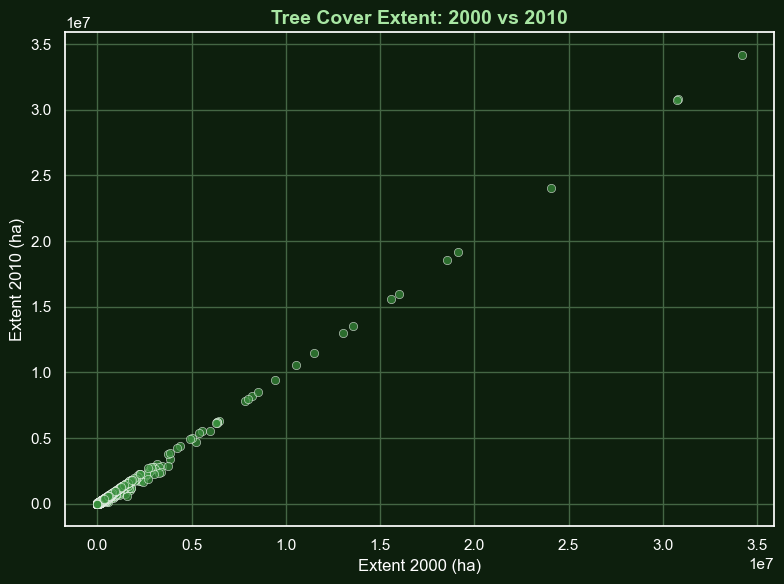

In [11]:
if "extent_2010_ha" in data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x="extent_2000_ha", y="extent_2010_ha", data=data, color="#388e3c", alpha=0.7)
    plt.title("Tree Cover Extent: 2000 vs 2010", fontsize=14, color="#a8e6a3")
    plt.xlabel("Extent 2000 (ha)")
    plt.ylabel("Extent 2010 (ha)")
    plt.tight_layout()
    plt.show()


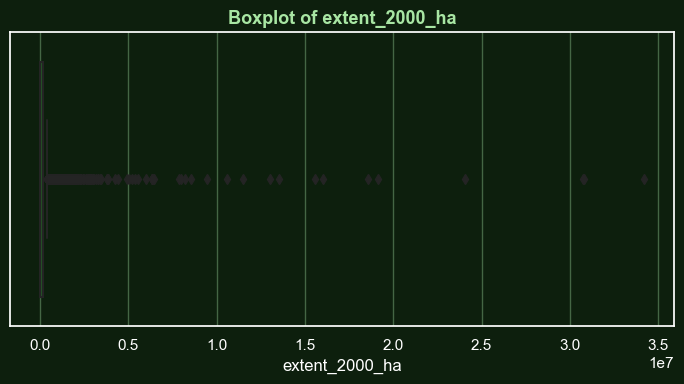

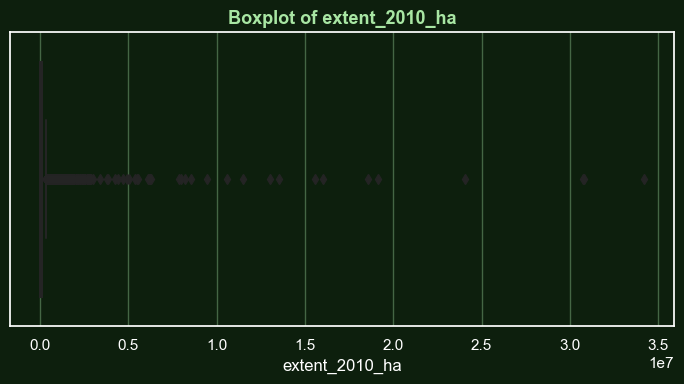

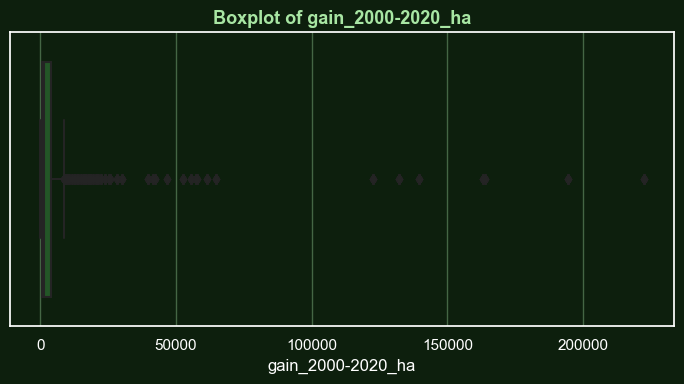

In [12]:
for col in ["extent_2000_ha", "extent_2010_ha", "gain_2000-2020_ha"]:
    if col in data.columns:
        plt.figure(figsize=(7, 4))
        sns.boxplot(x=data[col], color="#1b5e20")
        plt.title(f"Boxplot of {col}", fontsize=13, color="#a8e6a3")
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()


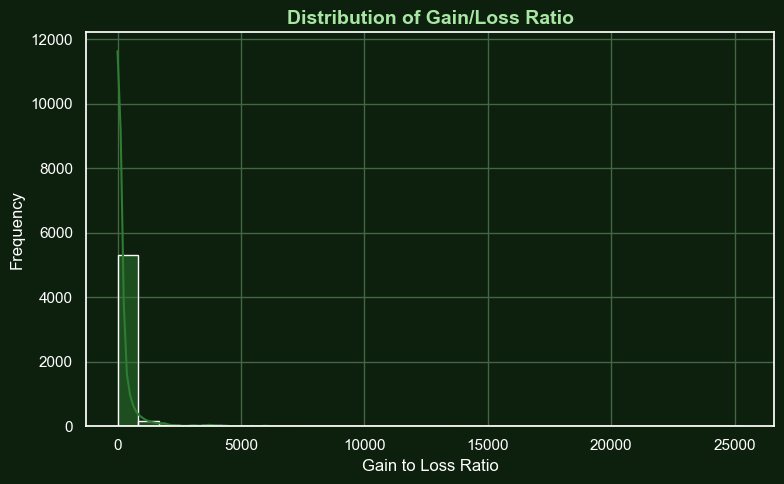

In [13]:
if "gain_2000-2020_ha" in data.columns:
    data["gain_loss_ratio"] = (data["gain_2000-2020_ha"] + 1) / (data[loss_cols].sum(axis=1) + 1)
    plt.figure(figsize=(8, 5))
    sns.histplot(data["gain_loss_ratio"], bins=30, kde=True, color="#2e7d32")
    plt.title("Distribution of Gain/Loss Ratio", fontsize=14, color="#a8e6a3")
    plt.xlabel("Gain to Loss Ratio")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


In [14]:
summary = {
    "rows": len(data),
    "columns": len(data.columns),
    "missing_values": data.isnull().sum().sum(),
    "numeric_features": len(data.select_dtypes(include=np.number).columns),
    "categorical_features": len(data.select_dtypes(exclude=np.number).columns)
}

summary_df = pd.DataFrame.from_dict(summary, orient="index", columns=["Count"])
summary_df.to_csv("visualization_summary.csv")
print("Visualization summary saved as visualization_summary.csv")
print("Visualization completed.")


Visualization summary saved as visualization_summary.csv
Visualization completed.
